In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

archivo_iris = "iris.data"
nombres_columnas = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris_data = pd.read_csv(archivo_iris, header=None, names=nombres_columnas)
iris_data.head(15)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


c:\Users\Khoss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Khoss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Khoss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Khoss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr


Estadísticas para sepal_length:
                  mean       var       std
class                                     
Iris-setosa      5.006  0.124249  0.352490
Iris-versicolor  5.936  0.266433  0.516171
Iris-virginica   6.588  0.404343  0.635880

Estadísticas para sepal_width:
                  mean       var       std
class                                     
Iris-setosa      3.418  0.145180  0.381024
Iris-versicolor  2.770  0.098469  0.313798
Iris-virginica   2.974  0.104004  0.322497

Estadísticas para petal_length:
                  mean       var       std
class                                     
Iris-setosa      1.464  0.030106  0.173511
Iris-versicolor  4.260  0.220816  0.469911
Iris-virginica   5.552  0.304588  0.551895

Estadísticas para petal_width:
                  mean       var       std
class                                     
Iris-setosa      0.244  0.011494  0.107210
Iris-versicolor  1.326  0.039106  0.197753
Iris-virginica   2.026  0.075433  0.274650


c:\Users\Khoss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Khoss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Khoss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Khoss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

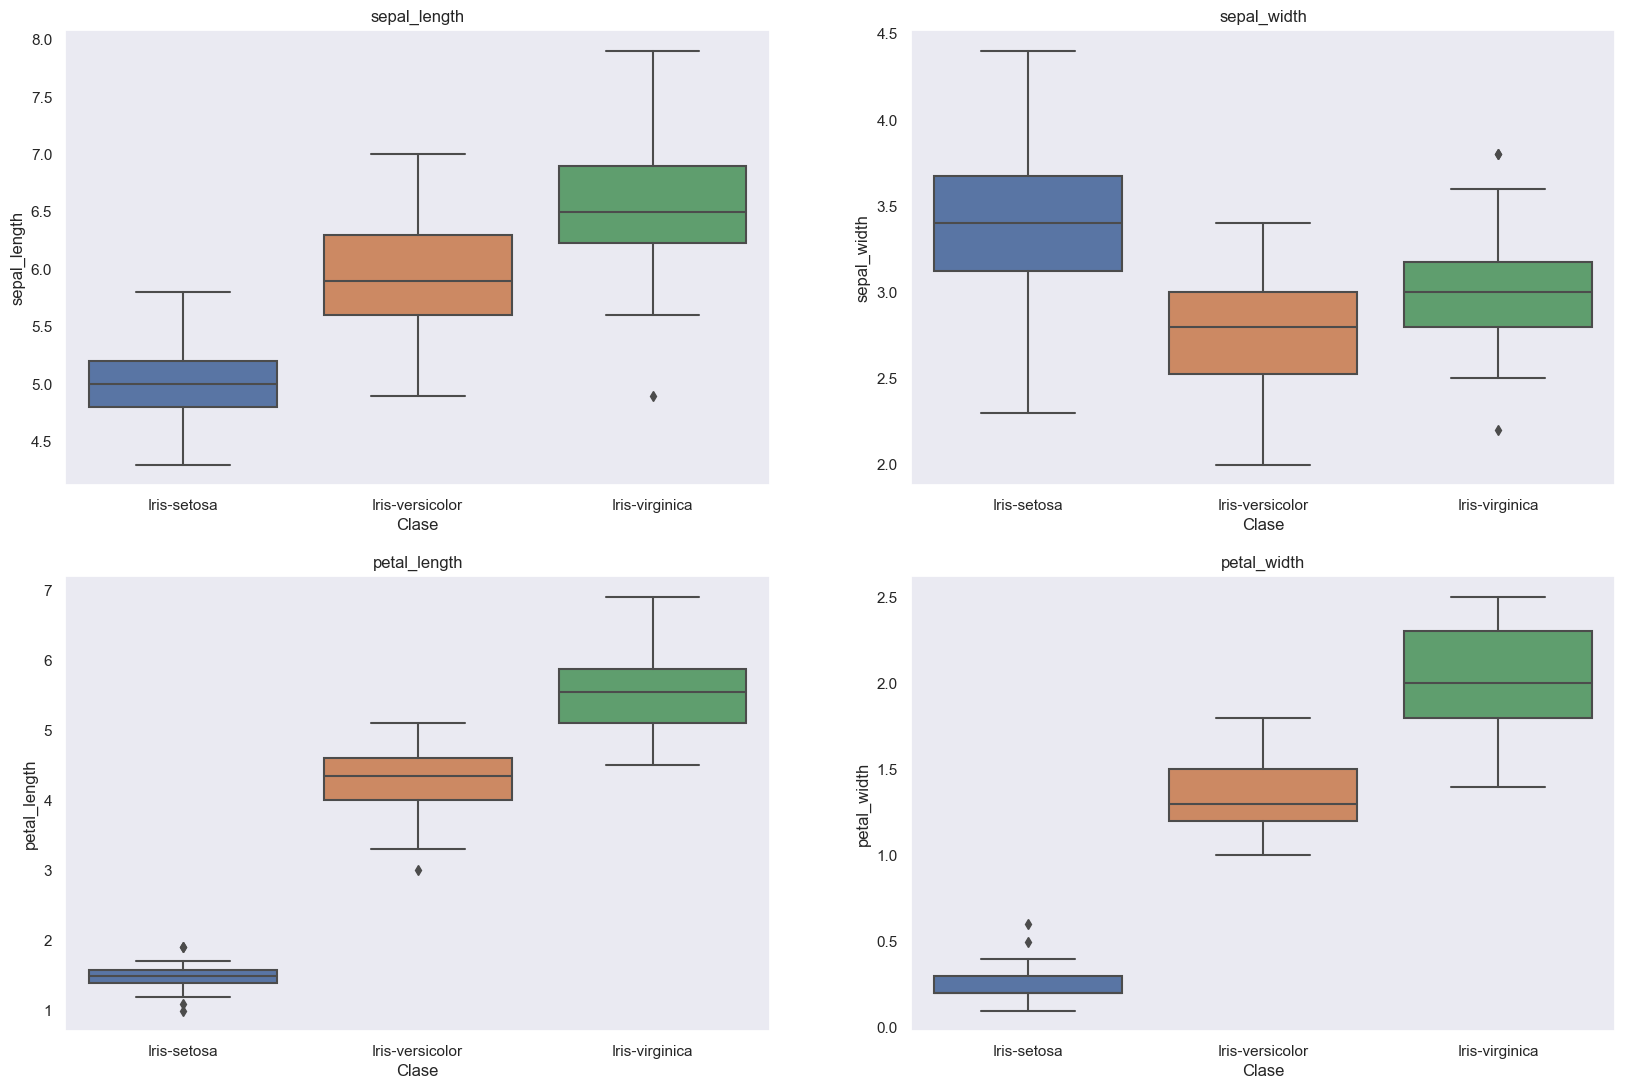

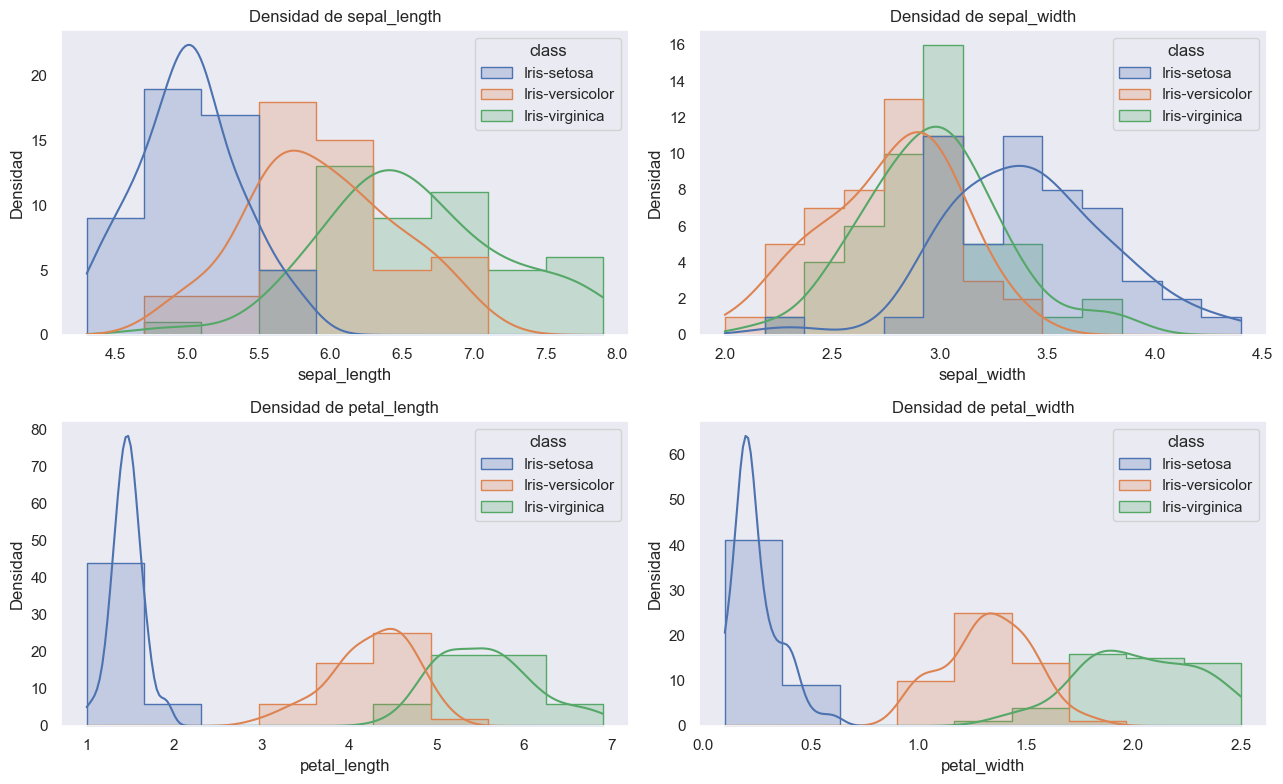

In [14]:
sns.set(style="dark")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 13))
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Iterar a través de las características
for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    ax = axes[row][col]
    
    # Gráfico de caja
    sns.boxplot(x="class", y=feature, data=iris_data, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel("Clase")
    ax.set_ylabel(feature)
    
    # Estadísticas resumidas
    summary_stats = iris_data.groupby("class")[feature].agg(["mean", "var", "std"])
    print(f"\nEstadísticas para {feature}:")
    print(summary_stats)

# histogramas de densidad
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    ax = axes[row][col]
    sns.histplot(data=iris_data, x=feature, hue="class", element="step", common_norm=False, kde=True, ax=ax)
    ax.set_title(f"Densidad de {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Densidad")

plt.tight_layout()
plt.show()

                  Mean       Var       Std
Feature                                   
sepal_length  5.843333  0.681122  0.825301
sepal_width   3.054000  0.186751  0.432147
petal_length  3.758667  3.092425  1.758529
petal_width   1.198667  0.578532  0.760613


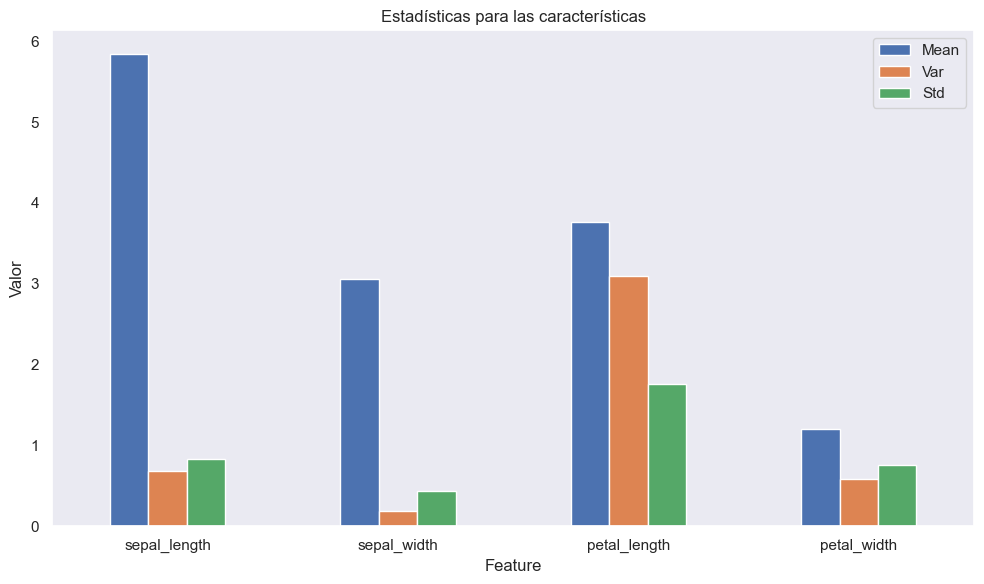

In [21]:
import numpy as np

# Función para calcular la media
def custom_mean(data):
    mean = sum(data) / len(data)
    return mean

# Función para calcular la varianza
def custom_var(data):
    n = len(data)
    mean = custom_mean(data)
    squared_diff = [(x - mean) ** 2 for x in data]
    variance = sum(squared_diff) / n
    return variance

# Función para calcular la desviación estándar
def custom_std(data):
    return np.sqrt(custom_var(data))

s_l_mean = custom_mean(iris_data["sepal_length"])
s_l_var = custom_var(iris_data["sepal_length"])
s_l_std = custom_std(iris_data["sepal_length"])

s_w_mean = custom_mean(iris_data["sepal_width"])
s_w_var = custom_var(iris_data["sepal_width"])
s_w_std = custom_std(iris_data["sepal_width"])

p_l_mean = custom_mean(iris_data["petal_length"])
p_l_var = custom_var(iris_data["petal_length"])
p_l_std = custom_std(iris_data["petal_length"])

p_w_mean = custom_mean(iris_data["petal_width"])
p_w_var = custom_var(iris_data["petal_width"])
p_w_std = custom_std(iris_data["petal_width"])

# diccionario
data = {
    "Feature": ["sepal_length", "sepal_width", "petal_length", "petal_width"],
    "Mean": [s_l_mean, s_w_mean, p_l_mean, p_w_mean],
    "Var": [s_l_var, s_w_var, p_l_var, p_w_var],
    "Std": [s_l_std, s_w_std, p_l_std, p_w_std]
}

stats_df = pd.DataFrame(data)
stats_df.set_index("Feature", inplace=True)
print(stats_df)
# Crear un gráfico de barras 
fig, ax = plt.subplots(figsize=(10, 6))
stats_df.plot(kind="bar", ax=ax, rot=0)
ax.set_ylabel("Valor")
ax.set_title("Estadísticas para las características")

plt.tight_layout()
plt.show()


Correlacion de Pearson

In [6]:
import numpy as np
def pearson(x, y):
    iris_x = np.array(iris_data[x])
    iris_y = np.array( iris_data[y])

    # Calcular la media de cada variable
    media_iris_x = np.mean(iris_x)
    media_iris_y = np.mean(iris_y)

    # Calcular las desviaciones de cada variable con respecto a su media
    desviaciones_iris_x = iris_x - media_iris_x
    desviaciones_iris_y = iris_y - media_iris_y

    # Calcular el coeficiente de correlación de Pearson
    correlacion = np.sum(desviaciones_iris_x * desviaciones_iris_y) / \
        np.sqrt(np.sum(desviaciones_iris_x**2) * np.sum(desviaciones_iris_y**2))

    # Imprimir el coeficiente de correlación
    print(f"\nCoeficiente de correlación de Pearson entre {x} y {y} es: {correlacion:.2f}")
        # Interpretar la correlación
    if correlacion > 0:
        print(f"Hay una correlación positiva: A medida que {x} aumenta, {y} aumenta.")
    elif correlacion < 0:
        print(f"Hay una correlación negativa: A medida que {x} aumenta, {y} disminuye")
    else:
        print(f"No hay una correlación lineal significativa entre {x} y {y}")


In [7]:
# Lista de características
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for i in range(len(features)):
    for j in range(i+1, len(features)):
        feature1 = features[i]
        feature2 = features[j]
        correlation = pearson(feature1, feature2)


Coeficiente de correlación de Pearson entre sepal_length y sepal_width es: -0.11
Hay una correlación negativa: A medida que sepal_length aumenta, sepal_width disminuye

Coeficiente de correlación de Pearson entre sepal_length y petal_length es: 0.87
Hay una correlación positiva: A medida que sepal_length aumenta, petal_length aumenta.

Coeficiente de correlación de Pearson entre sepal_length y petal_width es: 0.82
Hay una correlación positiva: A medida que sepal_length aumenta, petal_width aumenta.

Coeficiente de correlación de Pearson entre sepal_width y petal_length es: -0.42
Hay una correlación negativa: A medida que sepal_width aumenta, petal_length disminuye

Coeficiente de correlación de Pearson entre sepal_width y petal_width es: -0.36
Hay una correlación negativa: A medida que sepal_width aumenta, petal_width disminuye

Coeficiente de correlación de Pearson entre petal_length y petal_width es: 0.96
Hay una correlación positiva: A medida que petal_length aumenta, petal_width a

Anova

In [24]:
import scipy.stats as stats

grupos = iris_data["class"].unique()
caracteristicas = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for caracteristica in caracteristicas:
    print(f"ANALISIS DE ANOVA PARA: {caracteristica}\n")
    
    grupo_data = [iris_data[iris_data["class"] == grupo][caracteristica].values for grupo in grupos]
    
    # media total
    mean_total = np.mean(iris_data[caracteristica])
    
    #  suma de cuadrados entre grupos
    ss_between = sum(len(grupo) * (np.mean(grupo) - mean_total)**2 for grupo in grupo_data)
    
    #  suma de cuadrados dentro de grupos
    ss_within = sum(sum((x - np.mean(grupo))**2 for x in grupo) for grupo in grupo_data)
    
    # estadístico F
    df_between = len(grupos) - 1
    df_within = len(iris_data) - len(grupos)
    f_statistic = (ss_between / df_between) / (ss_within / df_within)
    
    # valor p utilizando la distribución F
    p_value = 1 - stats.f.cdf(f_statistic, df_between, df_within)
    
    print(f"Estadístico F: {f_statistic}")
    print(f"Valor p: {p_value}")
    
    if p_value < 0.05:
        print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.\n")
    else:
        print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.\n")


ANALISIS DE ANOVA PARA: sepal_length

Estadístico F: 119.26450218450438
Valor p: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

ANALISIS DE ANOVA PARA: sepal_width

Estadístico F: 47.36446140299379
Valor p: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

ANALISIS DE ANOVA PARA: petal_length

Estadístico F: 1179.0343277002205
Valor p: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

ANALISIS DE ANOVA PARA: petal_width

Estadístico F: 959.32440572576
Valor p: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

